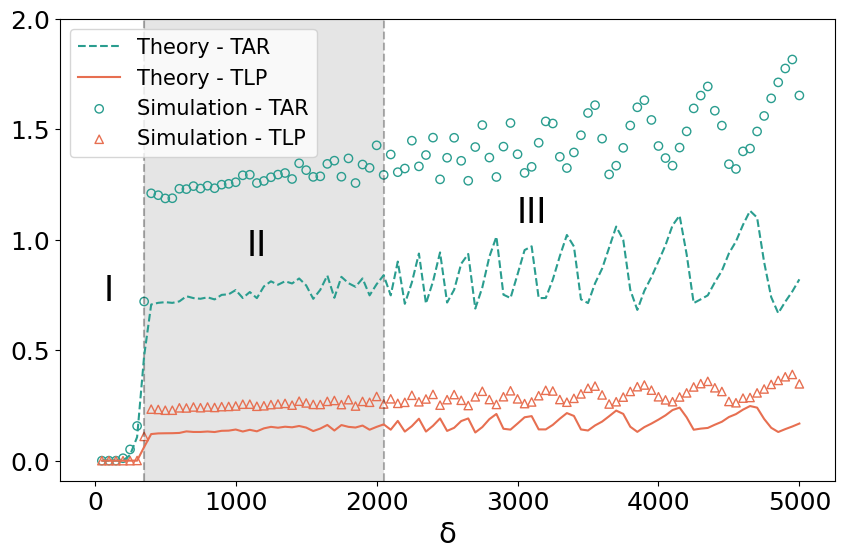

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
result1 = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig02_simulation_result.csv')
result2 = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig02_theory_result.csv')

# 计算每个参数组合的均值，
model1 = result1.groupby(['delta']).mean().reset_index()
model2 = result2.groupby(['delta']).mean().reset_index()

# 筛选数据，选择 delta 从 0 到 5000 并间隔为 50 的数据点
model1 = model1[(model1.iloc[:, 0] >= 0) & (model1.iloc[:, 0] <= 5000) & (model1.iloc[:, 0] % 50 == 0)]
model2 = model2[(model2.iloc[:, 0] >= 0) & (model2.iloc[:, 0] <= 5000) & (model2.iloc[:, 0] % 50 == 0)]


# 提取数据
x1 = model1['delta'] # \delta
y1 = model1['TAR']  # TAR
y2 = model2['TAR']
y12 = model1['TLP']  # TLP
y22 = model2['TLP']

plt.figure(figsize=(10, 6))

# 设置不同区域的背景颜色
plt.axvspan(0, 350, color='white', alpha=1)  
plt.axvspan(350, 2050, color='gray', alpha=0.2) 
plt.axvspan(2050, 5000, color='white', alpha=1) 
plt.axvline(x=350, color='black', linestyle='--', alpha=0.3)  # 虚线1
plt.axvline(x=2050, color='black', linestyle='--',  alpha=0.3)  # 虚线2

# 为每个区域添加标识
plt.text(100, 0.85, 'I', fontsize=25, verticalalignment='top', horizontalalignment='center', color='black')
plt.text(1150, 1.05, 'II', fontsize=25, verticalalignment='top', horizontalalignment='center', color='black')
plt.text(3100, 1.2, 'III', fontsize=25, verticalalignment='top', horizontalalignment='center', color='black')

# 理论模型 - TAR 和 TLP
TAR_color = '#2a9d8f'
TLP_color = '#e76f51'
plt.plot(x1, y2, label='Theory - TAR', linestyle='dashed', color=TAR_color)
plt.plot(x1, y22, label='Theory - TLP', linestyle='-', color=TLP_color)

# 随机模拟 - TAR 和 TLP
plt.scatter(x1, y1, label='Simulation - TAR', color=TAR_color,facecolor='none', marker='o')
plt.scatter(x1, y12, label='Simulation - TLP', color=TLP_color,facecolor='none', marker='^')

# 设置标签和图例
plt.xlabel('δ', fontsize=21)  # 根据实际情况调整X轴为δ
plt.ylabel('', fontsize=18)  # 根据实际情况调整Y轴标签
plt.legend(loc='upper left', fontsize=15)  # 图例放在左上角
# 设置刻度标签字体大小
plt.tick_params(axis='x', labelsize=18)  # X轴刻度标签字体大小
plt.tick_params(axis='y', labelsize=18)  # Y轴刻度标签字体大小
plt.grid(False)

# 设置 y 轴刻度
plt.yticks(np.arange(0, 2.1, 0.5))
plt.savefig(r'D:\VS code\project\Fig02-06\Fig02.pdf', format='pdf')
plt.show()


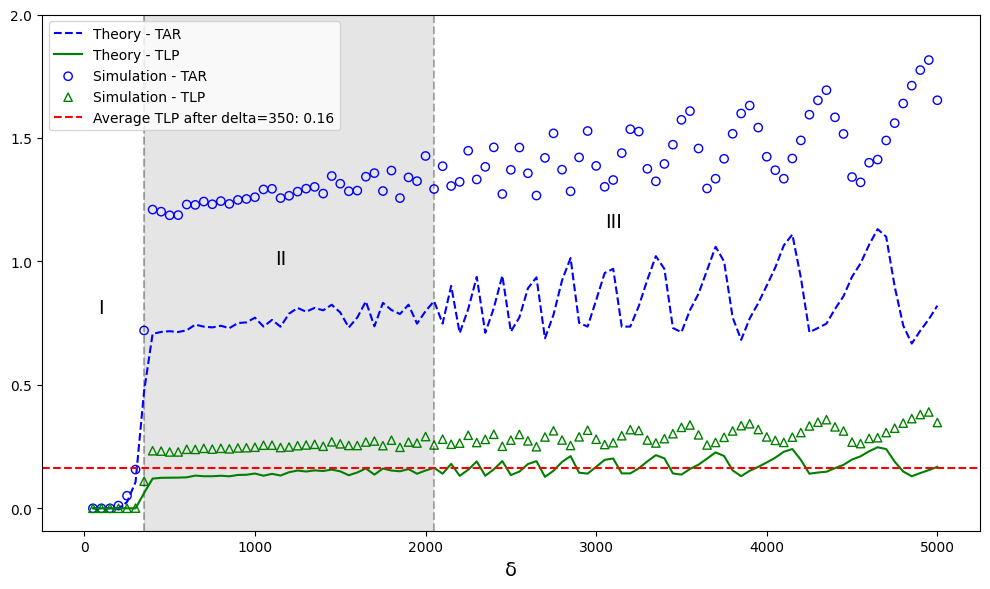

Average TLP after delta=350: 0.16
Corresponding delta where TLP equals the average: 3250


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取CSV文件
result1 = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig02_simulation_result.csv')
result2 = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig02_theory_result.csv')

# 计算每个参数组合的均值，
model1 = result1.groupby(['delta']).mean().reset_index()
model2 = result2.groupby(['delta']).mean().reset_index()

# 筛选数据，选择 delta 从 0 到 5000 并间隔为 50 的数据点
model1 = model1[(model1.iloc[:, 0] >= 0) & (model1.iloc[:, 0] <= 5000) & (model1.iloc[:, 0] % 50 == 0)]
model2 = model2[(model2.iloc[:, 0] >= 0) & (model2.iloc[:, 0] <= 5000) & (model2.iloc[:, 0] % 50 == 0)]

# 提取数据
x1 = model1['delta']  # \delta
y1 = model1['TAR']  # TAR (Simulation)
y2 = model2['TAR']  # TAR (Theory)
y12 = model1['TLP']  # TLP (Simulation)
y22 = model2['TLP']  # TLP (Theory)

# 计算 delta=350 之后的所有 TLP 的平均值
filtered_y22 = y22[x1 > 350]
average_tlp_after_350 = filtered_y22.mean()

# 查找 TLP 等于平均值对应的 delta
matching_delta_index = np.argmin(np.abs(y22 - average_tlp_after_350))
matching_delta_value = x1.iloc[matching_delta_index]

plt.figure(figsize=(10, 6))

# 设置不同区域的背景颜色
plt.axvspan(0, 350, color='white', alpha=1)  
plt.axvspan(350, 2050, color='gray', alpha=0.2) 
plt.axvspan(2050, 5000, color='white', alpha=1) 
plt.axvline(x=350, color='black', linestyle='--', alpha=0.3)  # 虚线1
plt.axvline(x=2050, color='black', linestyle='--', alpha=0.3)  # 虚线2

# 为每个区域添加标识
plt.text(100, 0.85, 'I', fontsize=14, verticalalignment='top', horizontalalignment='center', color='black')
plt.text(1150, 1.05, 'II', fontsize=14, verticalalignment='top', horizontalalignment='center', color='black')
plt.text(3100, 1.2, 'III', fontsize=14, verticalalignment='top', horizontalalignment='center', color='black')

# 理论模型 - TAR 和 TLP
TAR_color = 'blue'
TLP_color = 'green'
plt.plot(x1, y2, label='Theory - TAR', linestyle='dashed', color=TAR_color)
plt.plot(x1, y22, label='Theory - TLP', linestyle='-', color=TLP_color)

# 随机模拟 - TAR 和 TLP
plt.scatter(x1, y1, label='Simulation - TAR', color=TAR_color, facecolor='none', marker='o')
plt.scatter(x1, y12, label='Simulation - TLP', color=TLP_color, facecolor='none', marker='^')

# 在图中绘制一条水平红色虚线，表示平均 TLP 值
plt.axhline(y=average_tlp_after_350, color='red', linestyle='--', label=f'Average TLP after delta=350: {average_tlp_after_350:.2f}')

# 在图中绘制一条黑色竖线，标出 TLP 等于该平均值对应的 delta 值
#plt.axvline(x=matching_delta_value, color='black', linestyle='-', label=f'Corresponding delta: {matching_delta_value}')

# 设置标签和图例
plt.xlabel('δ', fontsize=14)  # 根据实际情况调整X轴标签
plt.ylabel('', fontsize=14)  # 根据实际情况调整Y轴标签
plt.legend(loc='upper left')  # 图例放在左上角

# 设置 y 轴刻度
plt.yticks(np.arange(0, 2.1, 0.5))

plt.grid(False)

plt.tight_layout()
plt.show()

# 打印计算的平均 TLP 值和对应的 delta
print(f"Average TLP after delta=350: {average_tlp_after_350:.2f}")
print(f"Corresponding delta where TLP equals the average: {matching_delta_value}")


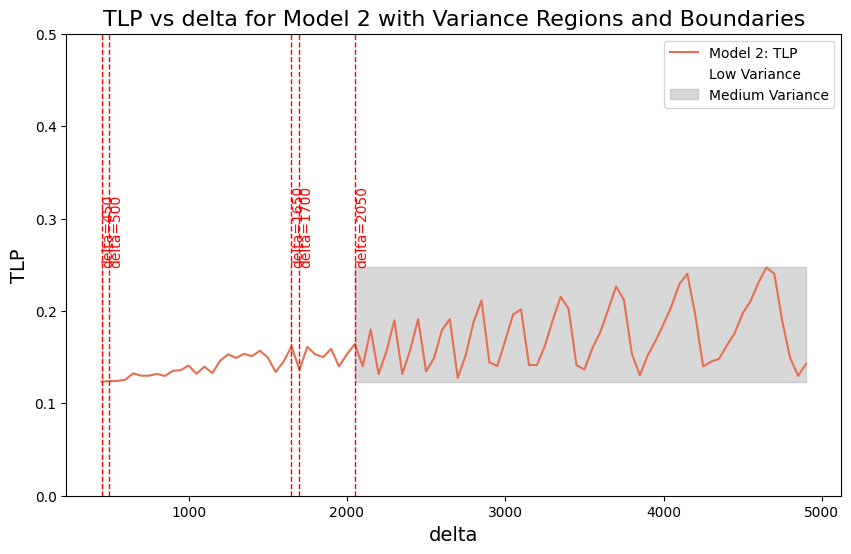

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
result1 = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig02_simulation_result.csv')
result2 = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig02_theory_result.csv')

# 计算每个参数组合的均值
model1 = result1.groupby(['delta']).mean().reset_index()
model2 = result2.groupby(['delta']).mean().reset_index()

# 筛选数据，选择 delta 从 0 到 5000 并间隔为 50 的数据点
model1 = model1[(model1['delta'] >= 0) & (model1['delta'] <= 5000) & (model1['delta'] % 50 == 0)]
model2 = model2[(model2['delta'] >= 0) & (model2['delta'] <= 5000) & (model2['delta'] % 50 == 0)]

# 提取数据
x1 = model1['delta']  # \delta
y1 = model1['TAR']  # TAR
y2 = model2['TAR']
y12 = model1['TLP']  # TLP
y22 = model2['TLP']  # TLP for model2

# 从 x=350 开始筛选数据
start_index = x1 >= 350
x1_filtered = x1[start_index]
y22_filtered = y22[start_index]

# 计算 y22 的滚动标准差
data = pd.DataFrame({'x': x1_filtered, 'y': y22_filtered})
data['rolling_std'] = data['y'].rolling(window=5, center=True).std()

# 去掉滚动标准差中的 NaN 值（位于边界的地方会产生 NaN）
data = data.dropna()

# 定义2个波动区域的分位数阈值
low_threshold = data['rolling_std'].quantile(0.33)


# 根据阈值划分为2类：波动较小、波动较大
conditions = [
    (data['rolling_std'] <= low_threshold),  # 波动较小
    (data['rolling_std'] > low_threshold)    # 波动较大
]
choices = ['low', 'medium']
data['variance_category'] = np.select(conditions, choices)

# 获取波动类型变化的分界点
boundary_points = data['x'][data['variance_category'].shift() != data['variance_category']]

# 定义颜色
TLP_color = '#e76f51'  # 示例颜色定义

# 绘制图形
plt.figure(figsize=(10, 6))

# 绘制 TLP 的折线图
plt.plot(data['x'], data['y'], label='Model 2: TLP', color=TLP_color)

# 绘制波动较小区域
plt.fill_between(data['x'], data['y'].min(), data['y'].max(),
                 where=data['variance_category'] == 'low', color='white', alpha=0.5, label='Low Variance')

# 绘制波动较大区域
plt.fill_between(data['x'], data['y'].min(), data['y'].max(),
                 where=data['variance_category'] == 'medium', color='gray', alpha=0.3, label='Medium Variance')

# 在图中标记白色与阴影分界点
for point in boundary_points:
    plt.axvline(x=point, color='red', linestyle='--', linewidth=1)
    plt.text(point, data['y'].max(), f'delta={point}', rotation=90, verticalalignment='bottom', fontsize=10, color='red')

# 添加标题和标签
plt.title('TLP vs delta for Model 2 with Variance Regions and Boundaries', fontsize=16)
plt.xlabel('delta', fontsize=14)
plt.ylabel('TLP', fontsize=14)

# 显示图例
plt.legend()
# 设置 y 轴刻度
plt.yticks(np.arange(0, 0.51, 0.1))

# 展示图像
plt.show()


图2 模拟和理论的拟合情况
横坐标：每日新增患者数δ；纵坐标TAR或TLP；虚线-理论结果的TAR,实线-理论结果的TLP；圆圈-模拟结果的TAR，三角-模拟结果的TLP,
拟合情况：TAR-虚线和圆圈，TLP-实线和三角，数值上有差距，趋势上一致
按照TLP将δ值分阶段：
（1）无损失患者期：TLP=0~0.01，其中当TLP=0.01时的δ值为阈值点δ_c，
（2）平稳期：TLP保持平稳变化，
（3）波动期：TLP波动明显，周期性变化，

model1 = pd.read_csv(r'd:\代码包\hospital\超星平台文件\hospital model\simulation_results\result001_mean.csv')
model2 = pd.read_csv(r'd:\代码包\hospital\超星平台文件\hospital model\simulation_results\result201_mean.csv')
model1随机模拟的结果，model2是理论结果
TAR和TLP随新增患者数p的变化情况
不同p值将结果分三个阶段：
（1）0~p_c：TAR和TLP都为0，p逐渐增大达到阈值点p_c；——————（p_c=290,300,310,320，由plot2.ipynb中阈值点分析）

（2）p_c~2000：随机结果和理论结果变化趋势高度一致，但数值上有一点差距，随机结果中的TAR和TLP值普遍高于理论结果，原因如下：
- 理论模型中医生均分每日新增患者，而随机模型中患者随机选择医生，选择每个医生的概率相等，但实际上每个医生接收的患者数不同，如#随机模型患者随机选择医生.ipynb#所示；这种随机性一定程度造成这种结果产生；
- 理论模型中使用的公式和函数表示转诊过程，计算过程中小数不可避免；而随机模型中转诊是以一个人或一群人(整数)来计算；公式计算出的小数使得TAR和TLP更小，同时饱和时间stop_day也更小。

（3）2000-5000：随着p增大，出现振荡，并且随机模拟和理论结果的振荡变化相反:
- 这是因为上面提到理论模型中使用公式和函数计算，使得饱和时间stop_day也更小，而随着p增大出现振荡变化，饱和时间stop_day的差异最终导致两者结果振荡变化相反。

